# Explore here

In [980]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima produces an error with numpy 2.2.2
Installed an older version of numpy
pip install numpy==1.26.4

In [981]:
### DATA ANALYSIS FOR SALES FORECASTING SYSTEM
### ESTIMATE THE RATE OF SALES FOR THE NEXT FEW MONTHS

# Get sales dataset
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

# Print the first rows of the dataframe for visualization
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [982]:
df.head().T

,0,1,2,3,4
date,2022-09-03 17:10:08.079328,2022-09-04 17:10:08.079328,2022-09-05 17:10:08.079328,2022-09-06 17:10:08.079328,2022-09-07 17:10:08.079328
sales,55.292157,53.803211,58.141693,64.530899,66.013633


In [983]:
# Shape of the dataframe
df.shape

(366, 2)

In [984]:
# Summary of the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [985]:
# Check if any missing values in the dataframe
df.isna().sum()

date     0
sales    0
dtype: int64

There are no missing values in the dataframe.

In [986]:
# Check if duplicate rows in the dataframe
print(f"Duplicate rows: {df.duplicated().sum():.2f}")

Duplicate rows: 0.00


There are no duplicated values in the dataframe.

In [987]:
# Check if duplicates in the column "sales" of the dataframe
print(f"Duplicate values in the column sales: {df['sales'].duplicated().sum():.2f}")

Duplicate values in the column sales: 0.00


There are no duplicated values in the column "sales" of the dataframe.

In [988]:
# Number of unique values in the dataframe
df.nunique()

date     366
sales    366
dtype: int64

In [989]:
# Unique values of the column "date" in the dataframe
df['date'].unique()

array(['2022-09-03 17:10:08.079328', '2022-09-04 17:10:08.079328',
       '2022-09-05 17:10:08.079328', '2022-09-06 17:10:08.079328',
       '2022-09-07 17:10:08.079328', '2022-09-08 17:10:08.079328',
       '2022-09-09 17:10:08.079328', '2022-09-10 17:10:08.079328',
       '2022-09-11 17:10:08.079328', '2022-09-12 17:10:08.079328',
       '2022-09-13 17:10:08.079328', '2022-09-14 17:10:08.079328',
       '2022-09-15 17:10:08.079328', '2022-09-16 17:10:08.079328',
       '2022-09-17 17:10:08.079328', '2022-09-18 17:10:08.079328',
       '2022-09-19 17:10:08.079328', '2022-09-20 17:10:08.079328',
       '2022-09-21 17:10:08.079328', '2022-09-22 17:10:08.079328',
       '2022-09-23 17:10:08.079328', '2022-09-24 17:10:08.079328',
       '2022-09-25 17:10:08.079328', '2022-09-26 17:10:08.079328',
       '2022-09-27 17:10:08.079328', '2022-09-28 17:10:08.079328',
       '2022-09-29 17:10:08.079328', '2022-09-30 17:10:08.079328',
       '2022-10-01 17:10:08.079328', '2022-10-02 17:10:08.0793

In [990]:
# Determine the type of the first date element
print(type(df.at[0,"date"]))

<class 'str'>


In [991]:
# Unique values of the column "sales" in the dataframe
df['sales'].unique()

array([  55.29215704,   53.80321135,   58.1416934 ,   64.53089878,
         66.01363287,   60.08186499,   68.46670361,   67.76510646,
         70.51226125,   74.65645304,   76.45952797,   82.99295751,
         83.51598989,   84.20064149,   87.76994586,   90.04211887,
         96.12607284,   93.63110055,   97.78851817,   96.88976758,
         94.39582507,  106.61839003,  109.85358257,  107.63651864,
        119.2750173 ,  110.70539613,  117.80850843,  119.71242105,
        127.47504997,  129.88752836,  128.54703406,  131.81941907,
        130.62431399,  129.94802155,  137.44941424,  141.56493732,
        147.38950218,  149.90850941,  147.74212914,  150.59994106,
        150.96393015,  152.45227496,  154.19625792,  167.7701344 ,
        162.9915914 ,  165.80906477,  165.96764132,  174.66123819,
        170.08981331,  176.89602573,  177.45058662,  183.90043352,
        183.81005034,  184.40330893,  190.46339852,  194.43568054,
        195.95297632,  199.26358008,  199.05593783,  202.47342

In [992]:
# Convert the column "date" to datetime
df.date = pd.to_datetime(df.date)
df.dtypes

date     datetime64[ns]
sales           float64
dtype: object

In [993]:
# Unique values of the column "date" in the dataframe in datetime format
df['date'].unique()

<DatetimeArray>
['2022-09-03 17:10:08.079328', '2022-09-04 17:10:08.079328',
 '2022-09-05 17:10:08.079328', '2022-09-06 17:10:08.079328',
 '2022-09-07 17:10:08.079328', '2022-09-08 17:10:08.079328',
 '2022-09-09 17:10:08.079328', '2022-09-10 17:10:08.079328',
 '2022-09-11 17:10:08.079328', '2022-09-12 17:10:08.079328',
 ...
 '2023-08-25 17:10:08.079328', '2023-08-26 17:10:08.079328',
 '2023-08-27 17:10:08.079328', '2023-08-28 17:10:08.079328',
 '2023-08-29 17:10:08.079328', '2023-08-30 17:10:08.079328',
 '2023-08-31 17:10:08.079328', '2023-09-01 17:10:08.079328',
 '2023-09-02 17:10:08.079328', '2023-09-03 17:10:08.079328']
Length: 366, dtype: datetime64[ns]

In [994]:
# Example to calculate the total days of an array of dates
array1=(['2022-09-03 17:10:08.079328', '2022-09-04 17:10:08.079328',
       '2022-09-05 17:10:08.079328', '2022-09-06 17:10:08.079328'])
array1 = pd.to_datetime(array1)
print(f"Substraction of the last date and the first date of the array with four dates: {(array1.max()-array1.min()).days}")

Substraction of the last date and the first date of the array with four dates: 3


To calculate the total days of an array of dates it is needed to add one day to the subtraction of the first and last date.

In [995]:
# Calculate the total days of the column "date"
print(f"Total number of days of the column date: {1+((df.date.max()-df.date.min()).days)}")

Total number of days of the column date: 366


In [996]:
# Unique values of the column "date" in the dataframe
df.date.nunique()

366

The number of days of the column "date" is the same than the number of unique values of the column "date", there are not missing values in the column "date".

The dataframe has values for 366 days.

The tensor of this time serie is a day (minimum unit of time for which there is data).

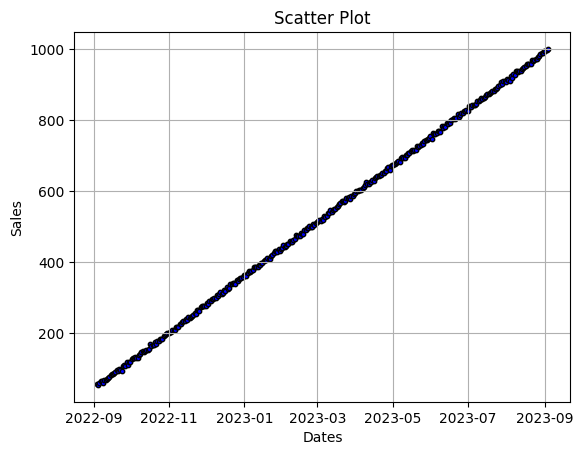

In [997]:
# Scatter plot "sales" values over time
plt.scatter(df['date'], df['sales'], color='blue', marker='o', s=10, edgecolor='black')
plt.title('Scatter Plot')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


Graphically, it seems that the sales values have a linear increase over time.

In [998]:
# Count the frequency of unique values in a dataframe 
df.sales.value_counts()

sales
1000.482785    1
55.292157      1
53.803211      1
58.141693      1
64.530899      1
              ..
93.631101      1
97.788518      1
96.889768      1
94.395825      1
106.618390     1
Name: count, Length: 366, dtype: int64

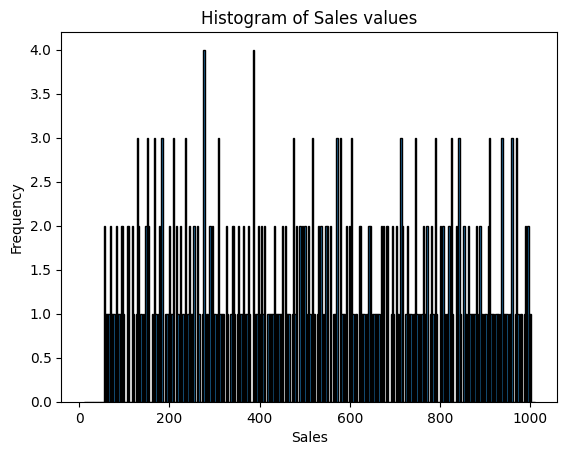

In [999]:
plt.hist(df['sales'], bins=366, edgecolor='black', range=[10, 1010])
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales values')
plt.show()

The sales values range is from 55.29 to 1000.48.

There are not many repeated sales values.

The sales values are repeated a maximum of 4 times.

The sales values are incremental over time and with a practically constant and homogeneous increase.

In [1000]:
# Decompose the "sales" values into its trend, seasonality and residual components
ts=df["sales"]
decomposition = seasonal_decompose(ts, period = 12)
decomposition

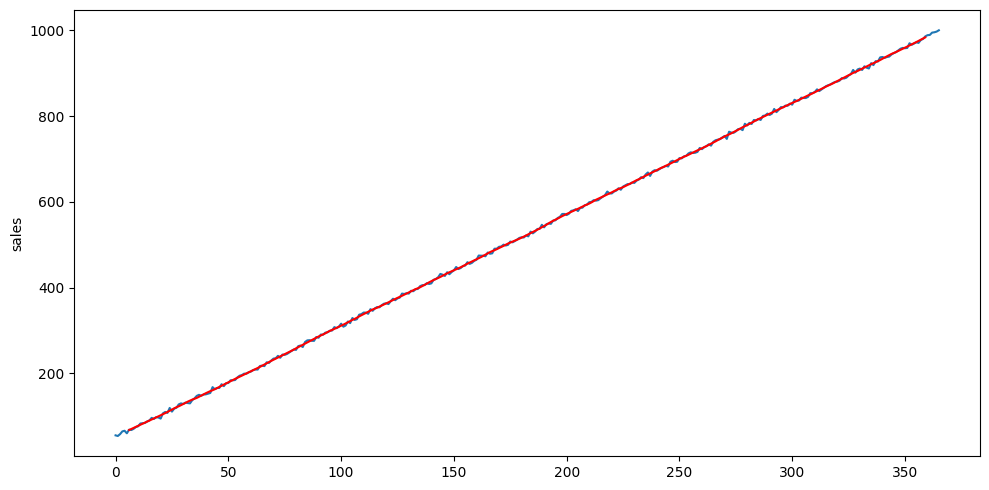

In [1001]:
# Trend of "sales" values
trend = decomposition.trend
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = ts)
sns.lineplot(data = trend, color='red', linewidth=1.5)
plt.tight_layout()
plt.show()

There is a a clear positive trend over the years.

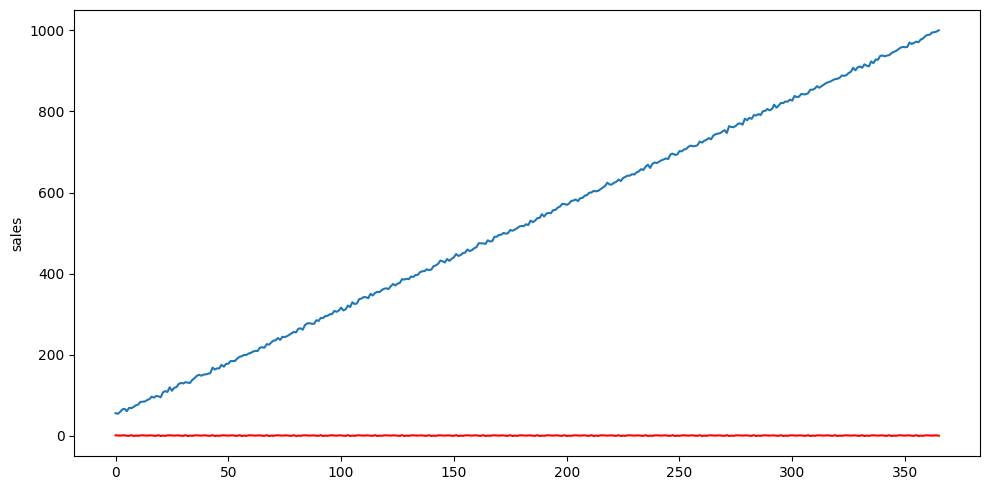

In [1002]:
# Seasonality of "sales" values
seasonal = decomposition.seasonal
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = ts)
sns.lineplot(data = seasonal, color='red', linewidth=1.5)
plt.tight_layout()
plt.show()

The seasonality is zero so, there is not a repeating short-term cycle or pattern for this time series.

In [1003]:
# Stationarity test of "sales" values
def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

According to the Dickey-Fuller test, the p-value is greater than 0.05 and we will take this time series as non-stationary.

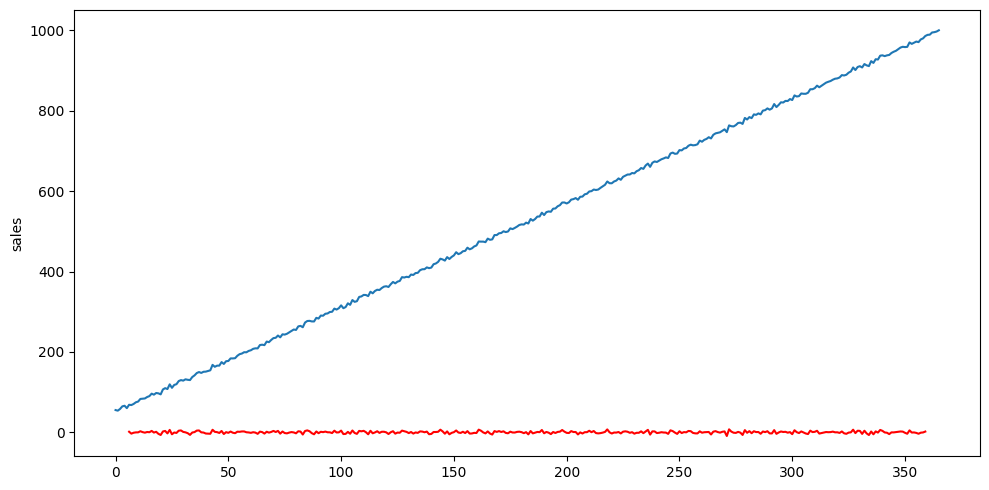

In [1004]:
# Residuals of "sales" values
residual = decomposition.resid
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = ts)
sns.lineplot(data = residual, color='red', linewidth=1.5)
plt.tight_layout()
plt.show()

In [1005]:
# Residual unique values
residual.unique()

array([        nan,  1.3481609 , -3.35966982, -1.12322587, -0.24489946,
       -0.16646504,  2.60963072,  0.37697952, -0.95197103,  0.69914366,
        0.14232567,  3.41518185, -0.67405734,  1.21000875, -3.84674704,
       -6.70630183,  2.06000641,  3.34574096, -2.7929788 ,  5.91717404,
       -4.96778643, -0.5391103 , -1.61888115,  3.933922  ,  4.60685705,
        0.92466474, -0.17153111, -2.25697417, -6.43586816, -0.60714683,
        0.48471118,  4.16430411,  4.53831488, -0.18416208, -0.67129197,
       -3.07770395, -3.33266405, -3.67011694,  6.26975246,  1.11923648,
        0.34294957, -1.66157075,  3.22738075, -4.32252457,  0.28316025,
       -1.35624798,  1.82417461, -1.12675719, -2.24705146,  1.47857065,
        1.18510394,  2.09808084,  2.09141561,  0.05216485, -0.42124163,
       -1.38356036,  0.17277489, -0.78009748, -3.86855881,  1.61552519,
        0.46997895, -3.25979845,  1.33838885, -0.82402064,  0.80320322,
        3.42849456,  0.67656915,  3.42906884, -3.38594661,  1.89

The waste load of this time series is not very high for the period studied.

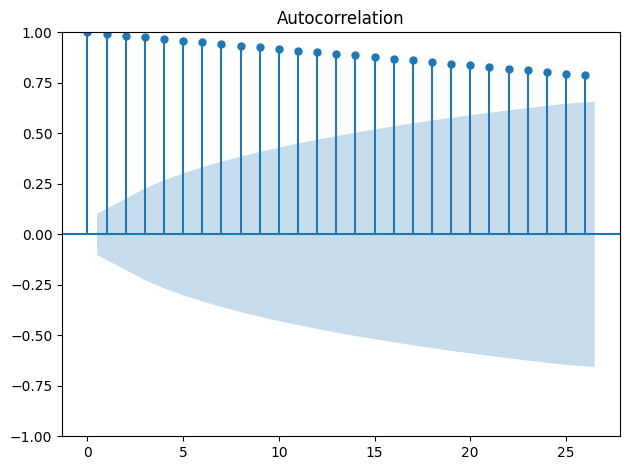

In [1006]:
# Autocorrelation of "sales" values
plot_acf(ts)
plt.tight_layout()
plt.show()

There is a high correlation between the points and their delayed copies, which decreases a little over time.

In [1007]:
# ARIMA model
# Transform the time series into stationary
ts_stationary = ts.diff().dropna()
# Stationarity test of stationary "sales" values
test_stationarity(ts_stationary)

Dickey-Fuller test results:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

As the the p-value of the Dickey-Fuller test is lower than 0.05, now the time series is stationary, and we can apply the automatic ARIMA method.

In [1008]:
# ARIMA model for no seasonality
model = auto_arima(ts_stationary, seasonal = False, trace = True, m = 1)

Performing stepwise search to minimize aic


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2205.881, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2208.143, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2176.042, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2112.720, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=2078.913, Time=0.04 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

 ARIMA(5,0,0)(0,0,0)[0]             : AIC=2042.352, Time=0.08 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.43 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.36 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1892.493, Time=0.25 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1896.458, Time=0.09 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=1844.458, Time=0.54 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=1843.028, Time=0.50 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1843.308, Time=0.39 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=1875.510, Time=0.49 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1910.621, Time=0.07 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=1868.613, Time=0.67 sec

Best model:  ARIMA(4,0,1)(0,0,0)[0] intercept
Total fit time: 5.006 seconds


In [1009]:
get_parameters = model.get_params()
print(type(get_parameters))
get_parameters

<class 'dict'>


{'maxiter': 50,
 'method': 'lbfgs',
 'order': (4, 0, 1),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

Residuals Charts


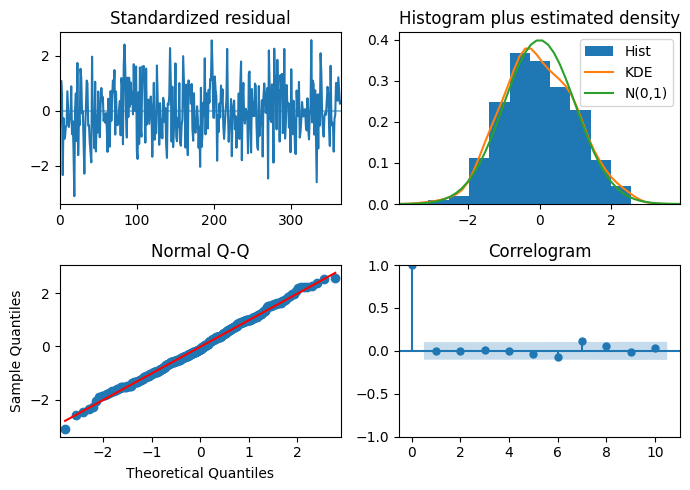

In [1010]:
print("Residuals Charts")
model.plot_diagnostics(figsize=(7,5))
plt.tight_layout()
plt.show()

PLOT DIAGNOSTICS:
Standardized residual: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Histogram: The density plot suggest normal distribution of the residual errors with mean zero.

Normal Q-Q: All the dots fall mostly in line with the red line.

Correlogram: The Correlogram plot shows that the residual errors are not autocorrelated. 

Overall, it seems to be a good fit.

In [1011]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(4, 0, 1)   Log Likelihood                -914.514
Date:                Sat, 08 Feb 2025   AIC                           1843.028
Time:                        16:10:59   BIC                           1870.327
Sample:                             0   HQIC                          1853.877
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.0866      0.392      7.879      0.000       2.319       3.854
ar.L1         -0.0959      0.054     -1.787      0.074      -0.201       0.009
ar.L2         -0.0069      0.064     -0.108      0.9

The sigma2 represents the variance of the residual values and it is 8.72 and it is not a low value.

The log likelihood measures how well the statistical model explains the observed data and it has a value of -914, not a low value.

So, the model doesn't fit very well this time series data.

In [1012]:
# Model prediction
forecast = model.predict(100)
forecast

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


365    1.453077
366    2.855652
367    2.673376
368    2.540513
369    2.701945
         ...   
460    2.597458
461    2.597458
462    2.597458
463    2.597458
464    2.597458
Length: 100, dtype: float64

In [1013]:
ts_stationary

1     -1.488946
2      4.338482
3      6.389205
4      1.482734
5     -5.931768
         ...   
361    0.518681
362    5.386972
363    0.827090
364    1.535798
365    3.132571
Name: sales, Length: 365, dtype: float64

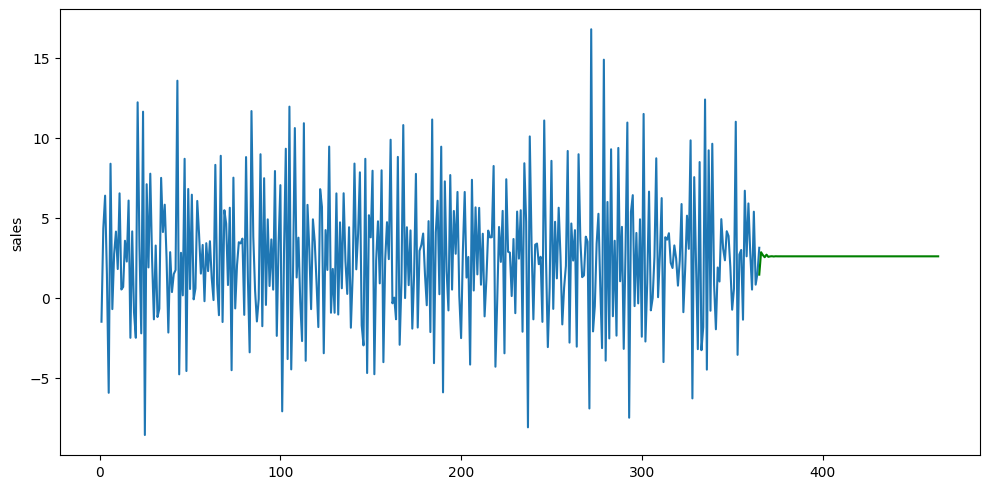

In [1014]:
# Plot the time series and the predictions
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = ts_stationary)
sns.lineplot(data = forecast, c = "green")
plt.tight_layout()
plt.show()